In [44]:
import numpy as np                 # for numerical python
import pandas as pd                # for data analysis
import seaborn as sns              # for visualization
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

[Boston Housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

In [45]:
df = pd.read_csv('housing.data', delim_whitespace = True, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [46]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [47]:
df.columns = col_name

In [48]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


# Exploratory Data Anaysis (EDA)

In [49]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Correlation Analysis and Feature Selection

In [51]:
pd.options.display.float_format = '{:,.3f}'.format

In [52]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


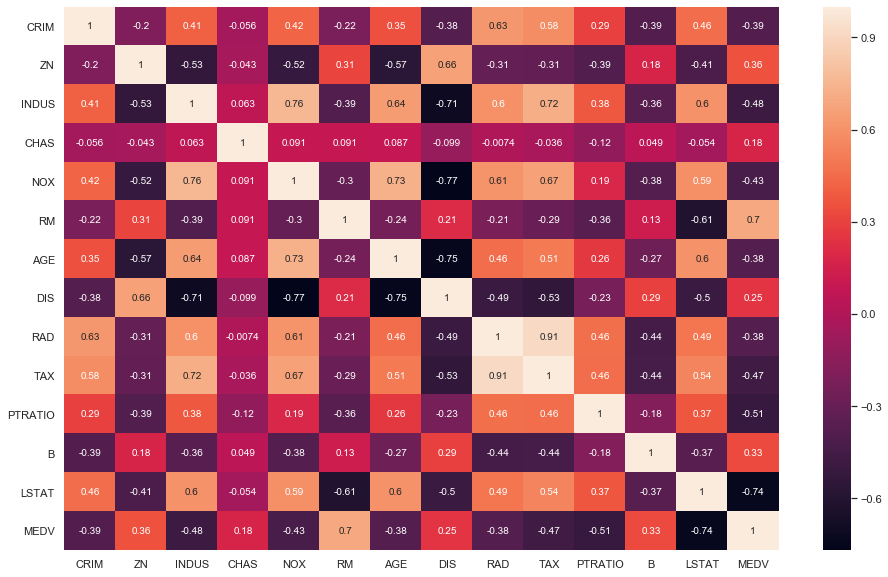

In [53]:
plt.figure(figsize=(16,10));

ax = sns.heatmap(df.corr(), annot = True); #notation: "annot" not "annote"
bottom, top = ax.get_ylim();
ax.set_ylim(bottom + 0.5, top - 0.5);

plt.show();

## RANdom SAmple Consensus (RANSAC) Algorithm

link = [http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

[RANSAC Algorithm](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

Each iteration performs the following steps:

1. Select `min_samples` random samples from the original data and check whether the set of data is valid (see `is_data_valid`).

2. Fit a model to the random subset (`base_estimator.fit`) and check whether the estimated model is valid (see `is_model_valid`).

3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (`base_estimator.predict(X) - y`) - all data samples with absolute residuals smaller than the `residual_threshold` are considered as inliers.

4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [54]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


In [55]:
x = df['RM'].values

In [56]:
y = df['MEDV'].values

## Step 1. Choose a class of model

In [57]:
from sklearn.linear_model import RANSACRegressor    # choosong a linear model

## Step 2. Arrage data into features matrix and target array

In [58]:
X = x.reshape(-1, 1)             # feature matrix (reshape as it's in vector)
X.shape

(506, 1)

## Step 3. Choose model hyperparameters

In [59]:
model = RANSACRegressor()    # design a model 

## Step 4. Fit model to data

In [60]:
model.fit(X, y)                  # fit model to data

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [61]:
inlier_mask = model.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [62]:
np.arange(3, 10, 1)

array([3, 4, 5, 6, 7, 8, 9])

In [63]:
line_X = np.arange(3, 10, 1)
line_y_ransac = model.predict(line_X.reshape(-1, 1))

## Visualise

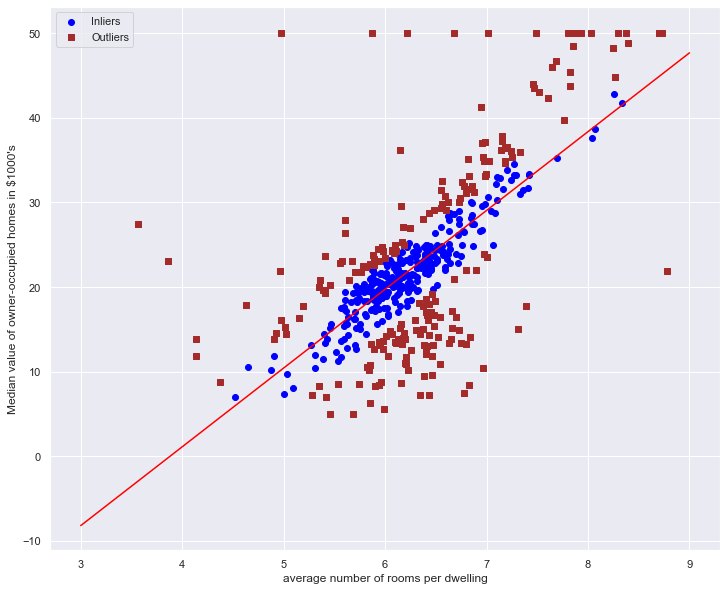

In [64]:
sns.set(style = 'darkgrid', context = 'notebook');
plt.figure(figsize=(12,10));

plt.scatter(X[inlier_mask], y[inlier_mask], 
            c = 'blue', marker = 'o', label = 'Inliers');
plt.scatter(X[outlier_mask], y[outlier_mask],
            c = 'brown', marker = 's', label = 'Outliers');
plt.plot(line_X, line_y_ransac, color = 'red');
plt.xlabel('average number of rooms per dwelling');
plt.ylabel("Median value of owner-occupied homes in $1000's");
plt.legend(loc = 'upper left');

plt.show();

In [65]:
model.estimator_.coef_

array([9.31388567])

In [66]:
model.estimator_.intercept_

-36.141103137984196

In [67]:
x = df['LSTAT'].values;
y = df['MEDV'].values;

X = x.reshape(-1, 1);             # feature matrix (reshape as it's in vector)
X.shape;

model = RANSACRegressor();    # design a model 
model.fit(X, y);                  # fit model to data

inlier_mask = model.inlier_mask_;
outlier_mask = np.logical_not(inlier_mask);

line_X = np.arange(0, 40, 1);
line_y_ransac = model.predict(line_X.reshape(-1, 1));

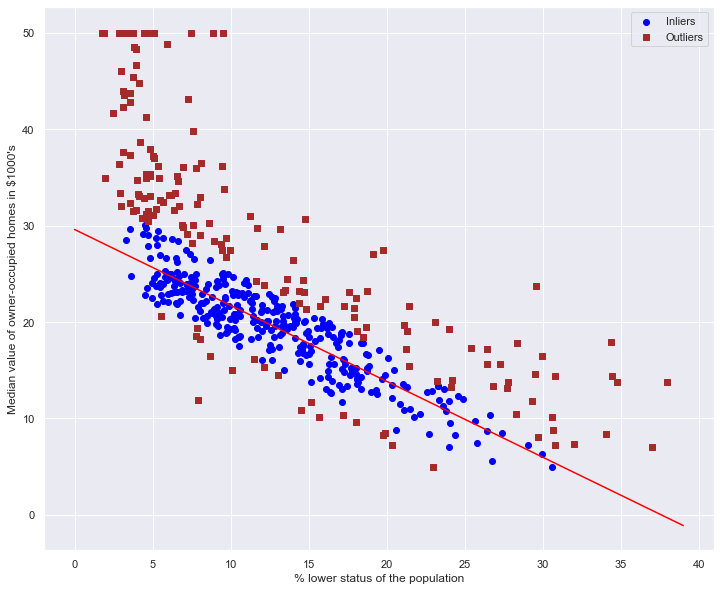

In [68]:
sns.set(style = 'darkgrid', context = 'notebook');
plt.figure(figsize=(12,10));

plt.scatter(X[inlier_mask], y[inlier_mask], 
            c = 'blue', marker = 'o', label = 'Inliers');
plt.scatter(X[outlier_mask], y[outlier_mask],
            c = 'brown', marker = 's', label = 'Outliers');
plt.plot(line_X, line_y_ransac, color = 'red');
plt.xlabel('% lower status of the population');
plt.ylabel("Median value of owner-occupied homes in $1000's");
plt.legend(loc = 'upper right');

plt.show();

In [69]:
model.estimator_.coef_

array([-0.78748077])

In [70]:
model.estimator_.intercept_

29.60308086844576

# Performance Evaluation of Regression Model

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression    # choosong a linear model

In [72]:
x = df['LSTAT'].values
X = x.reshape(-1, 1)

In [73]:
#X = df['LSTAT'].values.reshape(-1,1)
#X = df.iloc[:, :-1].values

In [74]:
y = df['MEDV'].values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
model = LinearRegression()    # design a model

In [77]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
y_train_pred = model.predict(X_train)

In [79]:
y_test_pred = model.predict(X_test)

# Method 1: Residual Analysis

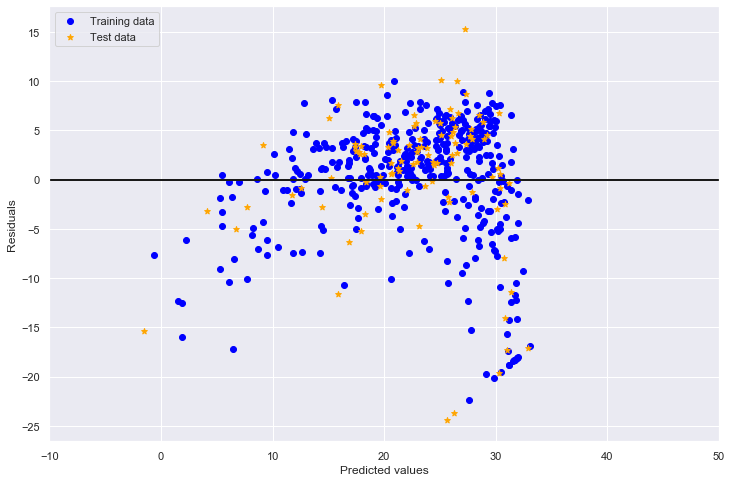

In [80]:
plt.figure(figsize=(12,8));

plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'orange', marker = '*', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'k')
plt.xlim([-10, 50])

plt.show();

# Method 2: Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
mean_squared_error(y_train, y_train_pred)

36.523966406959666

In [83]:
mean_squared_error(y_test, y_test_pred)

46.33630536002592

# Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [84]:
from sklearn.metrics import r2_score

In [85]:
r2_score(y_train, y_train_pred)

0.571031588576562

In [86]:
r2_score(y_test, y_test_pred)

0.43095672846187616